<a href="https://colab.research.google.com/github/matthewreader/continuous-learning/blob/main/books/deep-learning-with-pytorch/Deep_Learning_with_Pytorch_Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4.1 - Working with Images**

In [ ]:
import torch
from google.colab import drive

drive.mount('/content/gdrive')
GDRIVE_DATA = "gdrive/My Drive/Colab Notebooks/Data/deep-learning-with-pytorch"

Mounted at /content/gdrive


In [ ]:
import imageio

img_arr = imageio.imread(GDRIVE_DATA + "/p1ch4/image-dog/bobby.jpg")
img_arr.shape

(720, 1280, 3)

Use `imageio` to read an image.  The image is a 720x1280 image with 3 channels.  PyTorch expects the channels to be the first dimension, and the image can be changed to accomodate this using `permute` after first converting the image array into a PyTorch tensor.

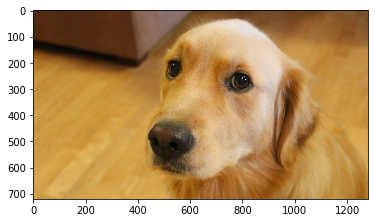

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img_arr, interpolation='nearest')
plt.show()

In [ ]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
out.shape

torch.Size([3, 720, 1280])

In the example above, we have an underlying 1D `Storage` object that represents the image's data.  The tensor of out is where the `Storage` data makes "sense"; the tensor has information into the three RGB channels, height, and width that we would need to display the image.

Adding another dimension is what happens when we talk about creating batches.  The example below uses a batch size of 3.  This works because our data set consists of three images, but setting the batch size to 2 would cause an error.  Setting the batch size to 4 does not cause an error.

In [ ]:
import os

# Define an 3x3x256x256 array of zeros.
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

data_dir = GDRIVE_DATA + "/p1ch4/image-cats/"

filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # Keep only first 3 channels (RGB)
    batch[i] = img_t

**4.2 3D Images / Volumetric data**

In [ ]:

dir_path = GDRIVE_DATA + "/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)2/99 files (2.0%)3/99 files (3.0%)4/99 files (4.0%)5/99 files (5.1%)6/99 files (6.1%)7/99 files (7.1%)8/99 files (8.1%)9/99 files (9.1%)10/99 files (10.1%)11/99 files (11.1%)12/99 files (12.1%)13/99 files (13.1%)14/99 files (14.1%)15/99 files (15.2%)16/99 files (16.2%)17/99 files (17.2%)18/99 files (18.2%)19/99 files (19.2%)20/99 files (20.2%)21/99 files (21.2%)22/99 files (22.2%)23/99 files (23.2%)24/99 files (24.2%)25/99 files (25.3%)26/99 files (26.3%)27/99 files (27

(99, 512, 512)

What get is a stack of 99 512x512 images.  PyTorch needs the 3D image in the form of channel x dimensions x height x width.

The images have no channel (they're greyscale), and we need to add the channel dimension for PyTorch.  This is where `unsqueeze` is used.

In [ ]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)
vol.shape

torch.Size([1, 99, 512, 512])

**4.3 Representing Tabular Data**

The book uses `csv` to read a tabular dataset.  Practically speaking, I would probably use `pandas` instead and have deviated from the book's code to reflect this.

In [ ]:
import pandas as pd
import numpy as np

wine_path = GDRIVE_DATA + "/p1ch4/tabular-wine/winequality-white.csv"
wineq_df = pd.read_csv(wine_path, delimiter=";", dtype=np.float32)
wineq_df



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.600000,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.000000,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.200000,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.100000,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [ ]:
wineq_numpy = wineq_df.to_numpy()
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [ ]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

Separating our target (quality) from our data:

In [ ]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [ ]:
target = wineq[:, -1].long() # convert target to int64
target, target.shape

(tensor([6, 6, 6,  ..., 6, 7, 6]), torch.Size([4898]))

Example using one-hot encoding on the target variable

In [ ]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Example of using some tensor aggregation functions and using them to normalize our wine quality data.

In [ ]:
# Calculate mean
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [ ]:
# Calculate variance
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [ ]:
# Normalize the data 
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7997e-02,  ...,  7.3995e-01,
          1.3417e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

**4.4 - Time Series**

In [ ]:
# In[2]:
bikes_numpy = np.loadtxt(
    GDRIVE_DATA + "/p1ch4/bike-sharing-dataset/hour-fixed.csv",
    dtype=np.float32,
    delimiter=",",
    skiprows=1,
    converters={1: lambda x: float(x[8:10])})
bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

In [ ]:
bikes.shape

torch.Size([17520, 17])

What we end up with after reading the CSV file is 17,520 hours worth of data containing 17 variables.  

We can use `view` to re-arrange the data into batches containing 24 hours.  

The code below creates batches of 24 rows (one for each hour) and 17 columns (from bikes.shape[1]).  The -1 in `view` tells the method to create as many batches as needed.  This works because 17,520 is evenly divisible by 24.

In [ ]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()


(torch.Size([730, 24, 17]), (408, 17, 1))

We can now think of our data as 730 different "stacked" tables, each of which represents one day with a record for each hour, and 17 variables per record.

One-Hot encoding the weather variable:

In [ ]:
first_day = bikes[:24].long() # convert values to int64
weather_onehot = torch.zeros(first_day.shape[0], 4) # 4 because weather can be 1,2,3 or 4
first_day[:,9] # all 24 rows, just weather column

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

In [ ]:
# In[7]:
weather_onehot.scatter_(
    dim=1,
    index=first_day[:,9].unsqueeze(1).long() - 1,
    value=1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [ ]:
# concatenate along column (1)
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

**4.5 - Representing Text**

In [ ]:
with open(GDRIVE_DATA + '/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
   text = f.read()

lines = text.split('\n')
line = lines[585]
line

'“Perhaps you mean what I overheard between him and Mr. Robinson; did not'

We could represent each letter of a line using one-hot encoding.  To do so, create a vector of zeros that is the length of the line by 128 (number of characters encoded by utf8).

In [ ]:
letter_t = torch.zeros(len(line), 128)
letter_t.shape

torch.Size([72, 128])

In [ ]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1

letter_t

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
letter_t

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

We can also one-hot encode the words of our sentence instead of each letter.  Embedding are more efficient since each vector representing a word would be very wide depending on the number of words in our vocabulary.

In [ ]:
def clean_words(input_str):
   punctuation = '.,;:"!?”“_-'
   word_list = input_str.lower().replace('\n',' ').split()
   word_list = [word.strip(punctuation) for word in word_list]
   return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Perhaps you mean what I overheard between him and Mr. Robinson; did not',
 ['perhaps',
  'you',
  'mean',
  'what',
  'i',
  'overheard',
  'between',
  'him',
  'and',
  'mr',
  'robinson',
  'did',
  'not'])

Building an index of words for our vocabulary:

In [ ]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

In [ ]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
   word_index = word2index_dict[word]
   word_t[i][word_index] = 1
   print('{:2} {:4} {}'.format(i, word_index, word))

print(word_t.shape)

 0 4787 perhaps
 1 7240 you
 2 4118 mean
 3 7073 what
 4 3315 i
 5 4627 overheard
 6  831 between
 7 3215 him
 8  447 and
 9 4305 mr
10 5638 robinson
11 1870 did
12 4436 not
torch.Size([13, 7261])


Our sentence has been converted from 13 words to a 13 by 7261 one-hot encoded tensor.

**4.7 Exercises** Take several pictures of red, blue, and green items with your phone or other digital camera (or download some from the internet, if a camera isn’t available).

a) Load each image, and convert it to a tensor.

b) For each image tensor, use the .mean() method to get a sense of how bright the image is.

c) Take the mean of each channel of your images. Can you identify the red, green, and blue items from only the channel averages?

In [ ]:
forest_arr = imageio.imread(GDRIVE_DATA + "/p1ch4/exercises/PXL_20210924_175025519.jpg")
forest_arr.shape

(4032, 3024, 3)

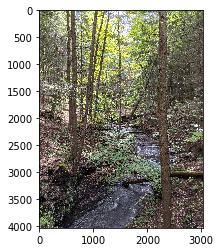

In [ ]:
plt.imshow(forest_arr, interpolation='nearest')
plt.show()

In [ ]:
forest = torch.from_numpy(forest_arr)
forest_t = forest.permute(2, 0, 1)
forest_t.shape

torch.Size([3, 4032, 3024])

In [ ]:
R_mean, G_mean ,B_mean = torch.mean(forest_t.float(), dim = [1,2])
print(R_mean)
print(G_mean)
print(B_mean)

tensor(104.1249)
tensor(101.8365)
tensor(83.9685)


In [ ]:
saw_arr = imageio.imread(GDRIVE_DATA + "/p1ch4/exercises/20151129_213225.jpg")
saw_arr.shape

(3264, 1836, 3)

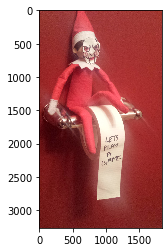

In [ ]:
plt.imshow(saw_arr, interpolation='nearest')
plt.show()

In [ ]:
saw = torch.from_numpy(saw_arr.copy())
saw_t = saw.permute(2, 0, 1)
saw_t.shape

torch.Size([3, 3264, 1836])

In [ ]:
# Get means of 1st and 2nd tensor dimensions
R_mean, G_mean ,B_mean = torch.mean(saw_t.float(), dim = [1,2])
print(R_mean)
print(G_mean)
print(B_mean)

tensor(157.3700)
tensor(64.8832)
tensor(63.7562)
